In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML datasets'
%ls

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML datasets
 abalone.data               fashion-mnist_test.csv              sigmoid
 covtype_train.csv          fashion-mnist_train.csv             test_cov.csv
 data_1.csv                 imagename.png                       test.csv
 data_2.csv                 mbti_1.csv                          test_data.csv
'Dataset Description.csv'   ml_ass3/                            test.npy
 diabetes2.csv              ml-latest-small/                    train.csv
 DT_A_1.png                 mnist_test.csv                      train_data.csv
 DT_B_1.png                 mnist_train.csv                     weights/
 DT-B-2-CC.png              PRSA_data_2010.1.1-2014.12.31.csv
 DT-B-2-XX.png             'ROC Curve.png'


In [2]:
!pip install pyclustering
#importing libraries
import numpy as np
from sklearn.metrics import f1_score
import pickle
from sklearn.metrics import confusion_matrix,accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from matplotlib import pyplot
from numpy import unique
from numpy import where
from sklearn.preprocessing import StandardScaler, normalize

     |████████████████████████████████| 2.6 MB 7.3 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=414e104eee7753139016148dcb1def9d33f00c64f9b2fcfe2dbb2ffef32ac6d2
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [3]:
#reading data
data = pd.read_csv("covtype_train.csv") 

#Data Analysis
print("Data Description: ")
print(data.info())
print("\n")

#null values
print(data.isnull().sum())

Data Description: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           406708 non-null  object
 1   Aspect                              406708 non-null  object
 2   Slope                               406708 non-null  object
 3   Hillshade_9am                       406708 non-null  object
 4   Hillshade_Noon                      406708 non-null  object
 5   Horizontal_Distance_To_Hydrology    406708 non-null  int64 
 6   Vertical_Distance_To_Hydrology      406708 non-null  int64 
 7   Horizontal_Distance_To_Fire_Points  406708 non-null  object
 8   Soil_Type                           406708 non-null  int64 
 9   Wilderness                          406708 non-null  int64 
 10  target                              406708 non-null  int64 
dtypes: int64(5), object(

#Pre-Processing:

In [4]:
#Label Encode
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Elevation']= le.fit_transform(data['Elevation'])
data['Aspect']= le.fit_transform(data['Aspect'])
data['Hillshade_9am']= le.fit_transform(data['Hillshade_9am'])
data['Hillshade_Noon']= le.fit_transform(data['Hillshade_Noon'])
data['Horizontal_Distance_To_Fire_Points']= le.fit_transform(data['Horizontal_Distance_To_Fire_Points'])
data['Slope']= le.fit_transform(data['Slope'])

In [5]:
#Scaling 
from sklearn.preprocessing import MinMaxScaler
#splitting into features and labels
Y= data['target']
X= data.drop(['target'],axis=1)
column_name= X.columns

In [ ]:
# Scaling the Data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled , columns = column_name)

#Feature Transformation:

In [ ]:
#Principle component Analysis
pca = PCA(random_state=0)
X= pca.fit_transform(X)
print(X.shape)

(406708, 10)


#Question 1:

In [ ]:
#Function for visulaization
def visualization(model, model_name):
  X_ran1, X_ran2, Y_ran1, Y_ran2 = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=123)
  pred = model.predict(X_ran2)

  #Visualization 1
  area = (12 * np.random.rand(len(X_ran2)))**2
  fig = plt.figure(figsize=(22,10))
  ax1 = fig.add_subplot(1,2,1,projection ="3d")
  ax2 = fig.add_subplot(1,2,2,projection ="3d")
  ax1.set_title(model_name+'Clustering Model')
  scatter = ax1.scatter3D(X_ran2[:, 0], X_ran2[:, 1], X_ran2[:, 2], s=area, c=pred)
  legend1 = ax1.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
  ax1.add_artist(legend1)
  ax2.set_title('Original Data')
  scatter2 = ax2.scatter3D(X_ran2[:, 0], X_ran2[:, 1], X_ran2[:, 2], s=area, c=Y_ran2)
  legend2 = ax2.legend(*scatter2.legend_elements(),loc="upper right", title="Classes")
  ax2.add_artist(legend2)
  plt.show()

In [ ]:
#Function to Compare your cluster distribution with the true label count.
def compare_distribution(model):
  pred= model.predict(X)
  unique_c, counts = np.unique(pred, return_counts=True)

  df = pd.DataFrame(pred, columns=['predicted'])
  for i in range(0, 7):
    print("Percentage of true labels in Cluster ", str(i))
    print('Total Instances : ', counts[i])
    df_value= df.loc[df['predicted'] == i]
    df_index= df_value.index
    true_value = Y[df_index]
    print(true_value.value_counts(normalize=True))
    print("\n")

  print('Total True Label Count :', )
  print(Y.value_counts().sort_index())

##Gaussian based clustering modelling:

In [ ]:
from sklearn.mixture import GaussianMixture
model_gaus = GaussianMixture(n_components=7)
model_gaus.fit(X)

GaussianMixture(n_components=7)

In [ ]:
#representative object of each cluster
rep_gaus= model_gaus.means_
rep_gaus= pd.DataFrame(rep_gaus)
rep_gaus.head(7)

,0,1,2,3,4,5,6,7,8,9
0,0.374499,-0.352381,-0.045478,-0.023474,-0.049090,0.058427,0.361452,0.923244,-0.140462,-0.014274
1,-0.316636,0.013611,-0.123355,0.339407,-0.123825,0.024863,-0.006386,-0.002221,-0.000277,-0.000186
2,-0.012727,0.052118,0.598731,0.031016,0.066321,-0.008704,-0.000110,-0.003967,0.001856,-0.000582
3,-0.169690,0.128627,-0.153196,-0.175078,0.039003,-0.009133,-0.001756,-0.002073,0.001148,-0.000722
4,-0.098816,-0.497621,-0.154174,-0.104401,0.030126,0.001608,0.002978,-0.024669,0.001340,-0.000138
5,0.601018,0.032439,0.125063,0.048649,-0.010960,-0.004448,-0.010741,-0.021514,0.002782,-0.000865
6,0.186271,0.093838,-0.024507,-0.042538,0.007640,-0.033118,0.326274,0.164159,0.051610,0.993997


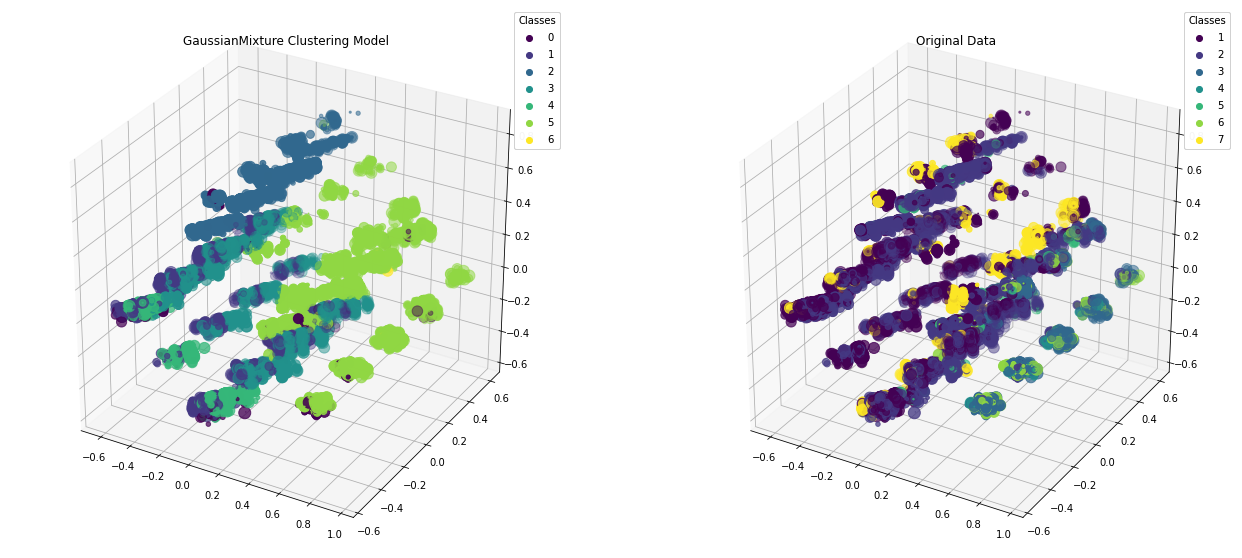

In [ ]:
#Visualization of the clusters
visualization(model_gaus, "GaussianMixture " )

In [ ]:
#Compare your cluster distribution with the true label count.
compare_distribution(model_gaus)

Percentage of true labels in Cluster  0
Total Instances :  3957
3    0.341168
2    0.304018
1    0.257266
6    0.086176
7    0.011120
5    0.000253
Name: target, dtype: float64


Percentage of true labels in Cluster  1
Total Instances :  73953
1    0.503266
2    0.462253
7    0.034062
5    0.000419
Name: target, dtype: float64


Percentage of true labels in Cluster  2
Total Instances :  47290
2    0.771897
1    0.158575
5    0.046860
7    0.022669
Name: target, dtype: float64


Percentage of true labels in Cluster  3
Total Instances :  146722
2    0.513120
1    0.453006
7    0.024829
5    0.008833
3    0.000211
Name: target, dtype: float64


Percentage of true labels in Cluster  4
Total Instances :  47805
1    0.561803
2    0.417613
7    0.012990
5    0.006987
6    0.000586
3    0.000021
Name: target, dtype: float64


Percentage of true labels in Cluster  5
Total Instances :  86694
2    0.358675
3    0.271899
6    0.135869
1    0.105636
7    0.074065
5    0.031675
4    0.022181
Name: t

##K Median Clustering:

In [ ]:
from pyclustering.cluster.kmedians import kmedians
intial = X[0:7]
kmedian = kmedians(X, intial)
kmedian.process()

In [ ]:
#representative object of each cluster
rep_kmedian = kmedian.get_medians()
rep_kmedian= pd.DataFrame(rep_kmedian)
rep_kmedian.head(7)

,0,1,2,3,4,5,6,7,8,9
0,-0.438971,0.174450,0.057652,-0.170511,-0.046830,-0.132728,0.062663,0.007518,0.031105,-0.001433
1,0.055941,-0.516487,-0.307895,-0.073961,0.074360,-0.213633,0.139954,-0.039338,0.019898,-0.001578
2,0.586968,-0.455835,0.240852,-0.020292,-0.074274,0.209355,0.557943,0.901975,-0.074959,-0.016088
3,0.034140,0.155212,-0.402274,-0.063917,0.192925,0.051116,0.121338,-0.046124,-0.085022,-0.000849
4,-0.414286,-0.483794,0.089631,-0.138766,0.024831,0.098607,0.037774,0.019066,0.161079,-0.001634
5,-0.003736,0.250331,0.704179,0.156074,0.681896,0.209823,0.097760,0.001162,0.038620,-0.001675
6,0.598827,-0.425560,0.249172,-0.020240,-0.108704,0.113196,0.110815,-0.068076,-0.042980,-0.000689


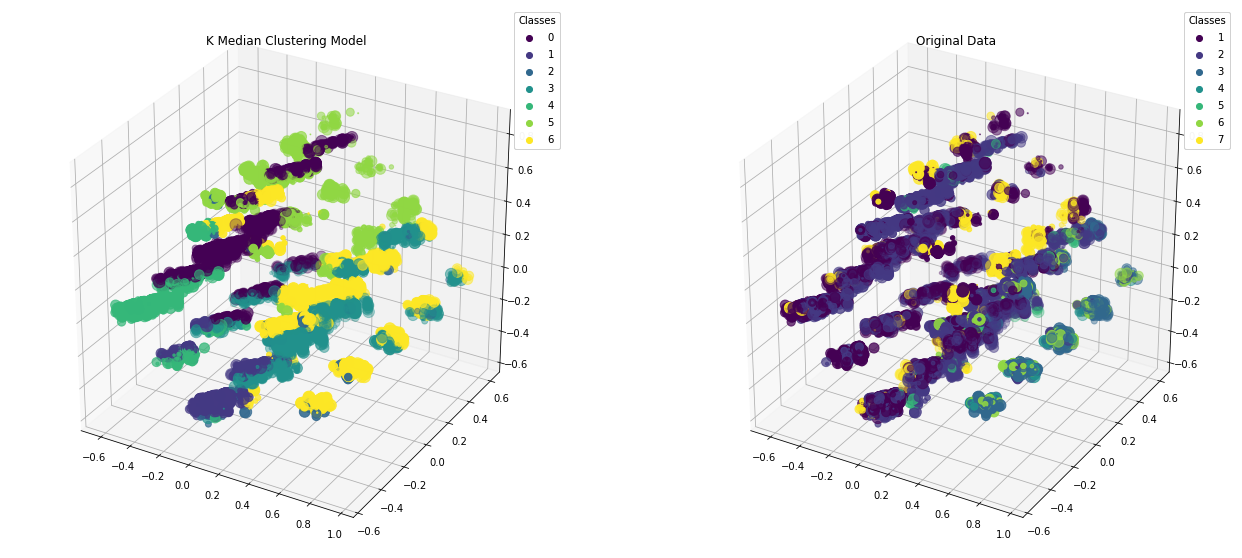

In [ ]:
#Visualization of the clusters
visualization(kmedian, "K Median " )

In [ ]:
#Compare your cluster distribution with the true label count.
compare_distribution(kmedian)

Percentage of true labels in Cluster  0
Total Instances :  127409
2    0.534413
1    0.437143
7    0.016796
5    0.011648
Name: target, dtype: float64


Percentage of true labels in Cluster  1
Total Instances :  48217
1    0.526599
2    0.428977
7    0.033992
5    0.009851
6    0.000581
Name: target, dtype: float64


Percentage of true labels in Cluster  2
Total Instances :  3532
3    0.385334
2    0.311721
1    0.194224
6    0.097112
7    0.011325
5    0.000283
Name: target, dtype: float64


Percentage of true labels in Cluster  3
Total Instances :  90989
2    0.519689
1    0.373913
3    0.037158
7    0.028421
6    0.021222
5    0.014738
4    0.004858
Name: target, dtype: float64


Percentage of true labels in Cluster  4
Total Instances :  43702
2    0.521555
1    0.463823
7    0.010022
5    0.004599
Name: target, dtype: float64


Percentage of true labels in Cluster  5
Total Instances :  21509
2    0.386024
1    0.321958
7    0.249709
5    0.042308
Name: target, dtype: float64


Perc

##K-Means Clustering:

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

KMeans(n_clusters=7)

In [ ]:
#representative object of each cluster
rep_kmeans = kmeans.cluster_centers_
rep_kmeans = pd.DataFrame(rep_kmeans)
rep_kmeans.head(7)

,0,1,2,3,4,5,6,7,8,9
0,0.641312,-0.296443,0.109913,0.040972,-0.048323,0.013356,-0.004054,0.016066,-0.001461,-0.000752
1,-0.421894,0.253227,0.019579,-0.050032,-0.066239,0.016941,-0.009528,0.008722,-0.000843,0.000228
2,0.043121,0.289019,-0.394947,0.010657,0.078138,-0.024306,0.012971,-0.001763,0.000543,-0.000562
3,0.591404,0.327890,0.097094,0.029945,-0.022620,-0.017554,0.000536,-0.004302,-0.000186,0.001402
4,0.006414,0.046192,0.595773,0.050057,0.097623,-0.008724,0.006127,-0.001242,0.000028,-0.000116
5,-0.408484,-0.279774,0.069915,-0.033688,-0.083470,0.019235,-0.018346,0.000710,0.003611,0.000110
6,0.048398,-0.371015,-0.314276,-0.004194,0.056422,-0.005160,0.014940,-0.015995,-0.002341,-0.000198


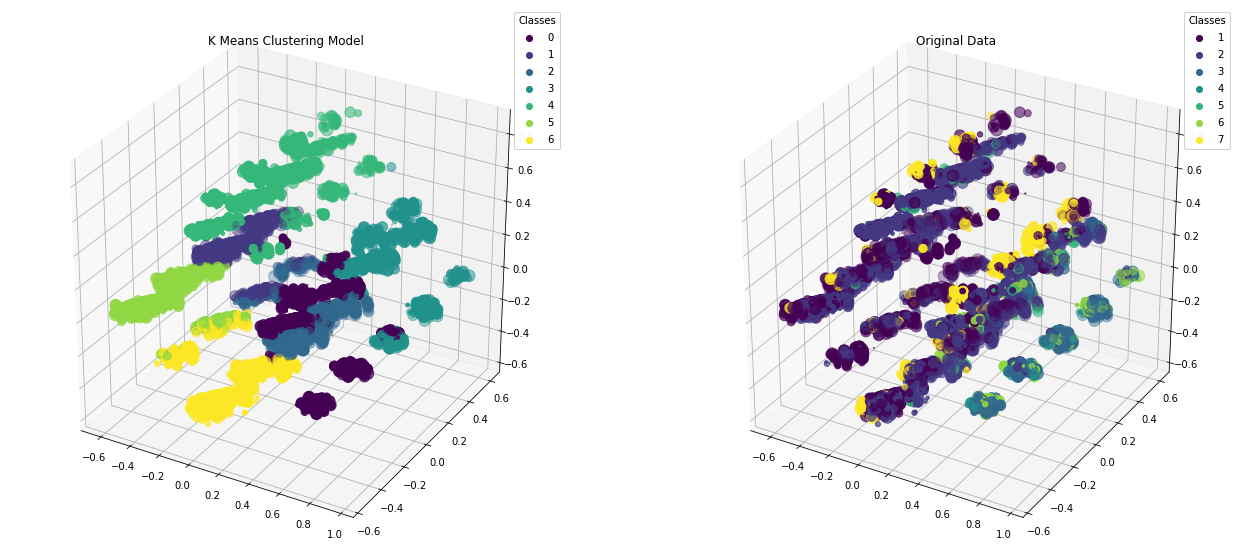

In [ ]:
#Visualization of the clusters
visualization(kmeans, "K Means " )

In [ ]:
#Compare your cluster distribution with the true label count.
compare_distribution(kmeans)

Percentage of true labels in Cluster  0
Total Instances :  41821
3    0.346668
2    0.297339
6    0.150522
1    0.073289
7    0.070228
5    0.032639
4    0.029315
Name: target, dtype: float64


Percentage of true labels in Cluster  1
Total Instances :  74863
1    0.506485
2    0.474373
7    0.016764
5    0.002378
Name: target, dtype: float64


Percentage of true labels in Cluster  2
Total Instances :  64918
2    0.499030
1    0.458024
7    0.035137
5    0.007640
3    0.000169
Name: target, dtype: float64


Percentage of true labels in Cluster  3
Total Instances :  44083
2    0.434998
3    0.238142
6    0.132341
1    0.099993
7    0.047365
5    0.031350
4    0.015811
Name: target, dtype: float64


Percentage of true labels in Cluster  4
Total Instances :  50929
2    0.722437
1    0.184119
7    0.049540
5    0.043904
Name: target, dtype: float64


Percentage of true labels in Cluster  5
Total Instances :  67253
2    0.493405
1    0.482715
7    0.020371
5    0.003509
Name: target, dtype: 

##BIRCH Clustering:

In [ ]:
from sklearn.cluster import Birch
model_birch = Birch(threshold=0.01, n_clusters=7)
model_birch.fit(X)

Birch(n_clusters=7, threshold=0.01)

In [ ]:
#representative object of each cluster
rep_birch = model_birch.subcluster_centers_
rep_birch  = pd.DataFrame(rep_birch)
rep_birch.head(7)

,0,1,2,3,4,5,6,7,8,9
0,0.187618,0.522233,-0.422880,-0.123937,0.006443,0.613125,0.026188,0.028415,0.175191,-0.002526
1,-0.149167,0.510755,-0.204652,-0.139939,0.025822,0.212644,0.049513,0.024016,0.103017,-0.002200
2,-0.052724,0.199297,-0.158329,-0.171806,-0.130139,0.470034,0.016055,-0.003932,0.051143,-0.000918
3,-0.153232,0.514746,-0.223849,-0.126234,0.086621,0.355733,0.041428,0.009596,0.050633,-0.001505
4,-0.115804,0.508567,-0.212816,-0.132344,0.030396,0.183016,-0.277844,0.061005,0.069998,0.000349
5,-0.064019,0.530373,-0.188109,-0.177906,-0.121262,0.454387,0.016099,0.007214,0.051047,-0.001261
6,-0.066114,0.526465,-0.160529,-0.197451,-0.210678,0.254347,0.040900,-0.026625,-0.078735,-0.000374


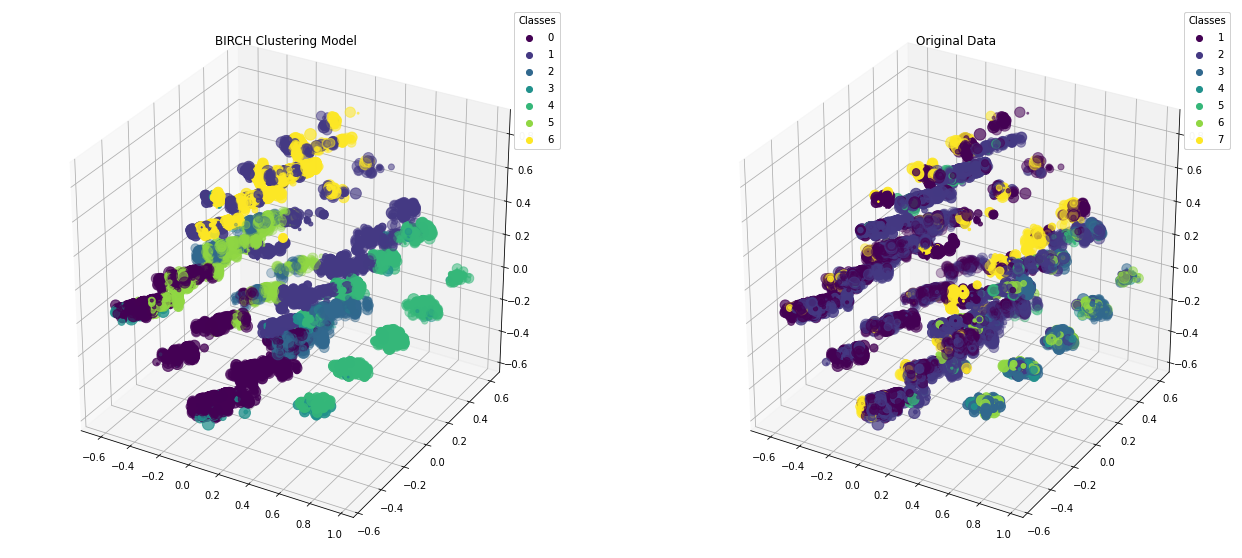

In [ ]:
#Visualization of the clusters
visualization(model_birch, "BIRCH " )

In [ ]:
#Compare your cluster distribution with the true label count.
compare_distribution(model_birch)

Percentage of true labels in Cluster  0
Total Instances :  127535
1    0.518289
2    0.446285
7    0.026714
5    0.007331
3    0.000800
6    0.000580
Name: target, dtype: float64


Percentage of true labels in Cluster  1
Total Instances :  43428
2    0.549346
1    0.222184
7    0.149351
6    0.034609
5    0.030096
3    0.014415
Name: target, dtype: float64


Percentage of true labels in Cluster  2
Total Instances :  76077
2    0.519171
1    0.440817
7    0.033400
5    0.006467
3    0.000145
Name: target, dtype: float64


Percentage of true labels in Cluster  3
Total Instances :  4244
3    0.335533
2    0.300895
1    0.256833
6    0.082469
7    0.019086
5    0.005184
Name: target, dtype: float64


Percentage of true labels in Cluster  4
Total Instances :  55998
3    0.408318
2    0.327565
6    0.182685
4    0.034341
5    0.028858
1    0.018233
Name: target, dtype: float64


Percentage of true labels in Cluster  5
Total Instances :  65001
2    0.508100
1    0.475454
7    0.012846
5    0.

##Part 4: Compare the cluster formation of the gaussian based method with the other three clustering

In [ ]:
result_gaus= model_gaus.predict(X)

results=[]
results.append(result_gaus)
results.append(kmedian.predict(X))
results.append(kmeans.predict(X))
results.append(model_birch.predict(X))

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

nmi_results = []
ars_results = []

y_true_val = list(result_gaus)

# Append the results into lists
for y_pred in results:
    nmi_results.append(normalized_mutual_info_score(y_true_val, y_pred))
    ars_results.append(adjusted_rand_score(y_true_val, y_pred))

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 5))

x = np.arange(4)
avg = [sum(x) / 2 for x in zip(nmi_results, ars_results)]

xlabels = ['Gaussian', 'K Meadian', 'K Means', 'Birch']

sns.barplot(x, nmi_results, palette='Blues', ax=ax1)
sns.barplot(x, ars_results, palette='Reds', ax=ax2)
sns.barplot(x, avg, palette='Greens', ax=ax3)

ax1.set_ylabel('NMI Score')
ax2.set_ylabel('ARS Score')
ax3.set_ylabel('Average Score')

# # Add the xlabels to the chart
ax1.set_xticklabels(xlabels)
ax2.set_xticklabels(xlabels)
ax3.set_xticklabels(xlabels)

# Add the actual value on top of each bar
for i, v in enumerate(zip(nmi_results, ars_results, avg)):
    ax1.text(i - 0.1, v[0] + 0.01, str(round(v[0], 2)))
    ax2.text(i - 0.1, v[1] + 0.01, str(round(v[1], 2)))
    ax3.text(i - 0.1, v[2] + 0.01, str(round(v[2], 2)))

# Show the final plot
print("NMI , ARS and Average Scores of all clustering algorithms as compared to Gaussian Clustering:")
plt.title("NMI , ARS and Average Scores of all clustering algorithms as compared to Gaussian Clustering")
plt.show()

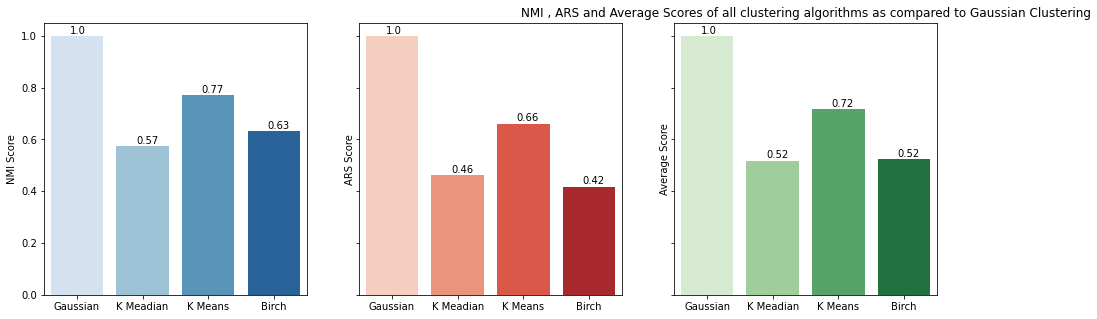

#Question 2:

In [6]:
#splitting into training and testing data sets in 8:2 ratio
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, stratify=data['target'], random_state=123)

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_train)

KMeans(n_clusters=7)

In [8]:
pred_train= kmeans.predict(X_train)
pred_val= kmeans.predict(X_val)
cm = confusion_matrix(Y_train, pred_train)
cm_argmax = cm.argmax(axis=0)
y_pred_val = np.array([cm_argmax[i] for i in pred_val])
score= f1_score(Y_val,y_pred_val, average= 'micro')
print("Balanced F1- score : ", score )

Balanced F1- score :  0.6078778490816552
